In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,8)}
        )
#Определяем настройки отображения графиков

In [3]:
bike = pd.read_csv('/home/jupyter-a.denisenko-14/Statistics/london.csv',parse_dates=['timestamp'])
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bike.shape #Проверим количество строк и столбцов

(17414, 10)

In [5]:
bike.isna().sum() #Проверим количество пропущенных значений

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

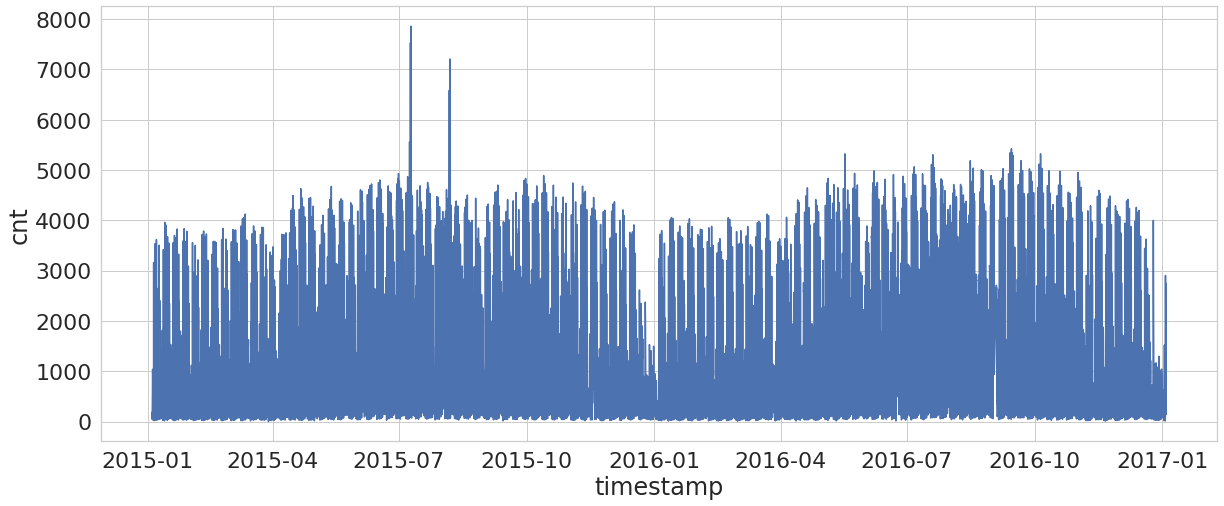

In [7]:
sns.lineplot(x=bike.timestamp, y=bike.cnt)

In [8]:
bike.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


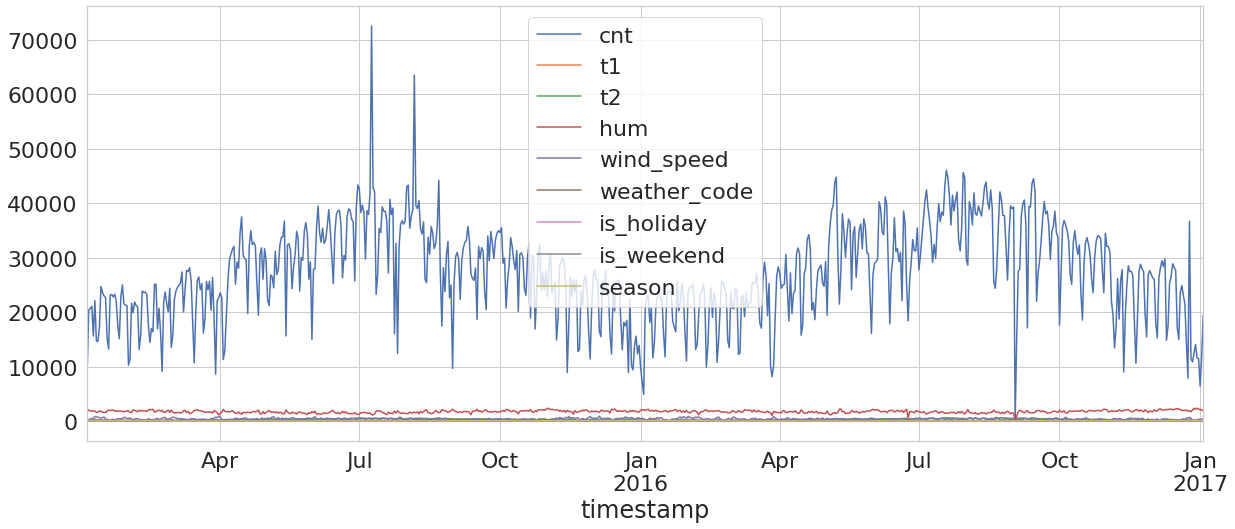

In [9]:
#При помощи resample агрегируем данные по дням
bike_day = bike.sort_values('timestamp') \
                .set_index('timestamp') \
                .resample(rule='D').sum() \
                .plot()

In [10]:
bike_day = bike.sort_values('timestamp') \
    .set_index('timestamp') \
    .resample(rule='D') \
    .sum()

In [11]:
bike_day.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0


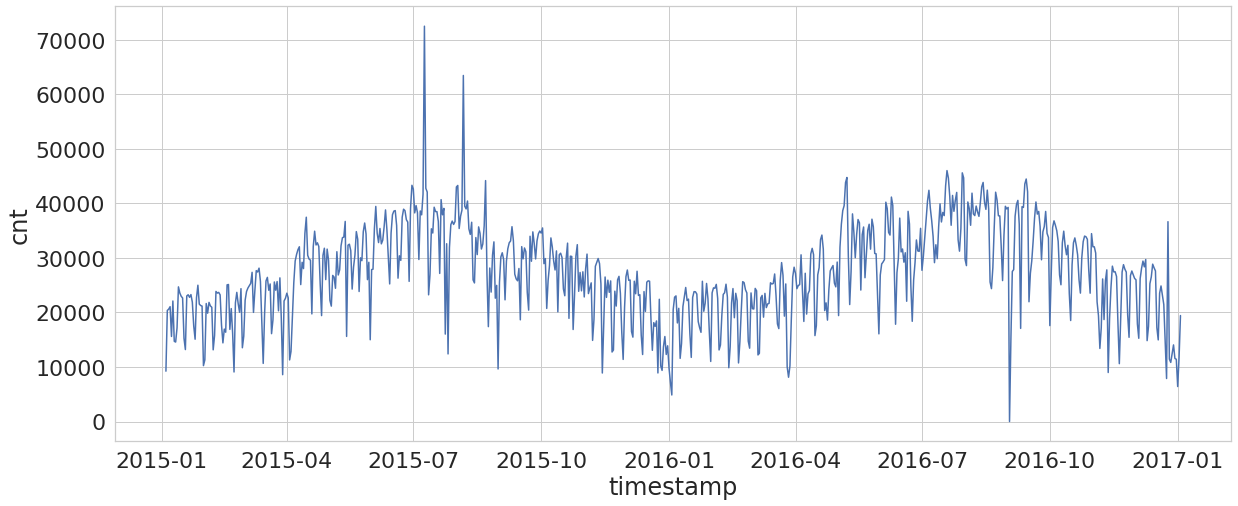

In [12]:
sns.lineplot(x=bike_day.index, y=bike_day.cnt)

In [13]:
bike_day.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0


In [14]:
bike_day['MA_3'] = bike_day.cnt.rolling(3) \
                            .mean()

In [15]:
bike_day.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,MA_3
timestamp,,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,NaN
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,NaN
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,16739.666667


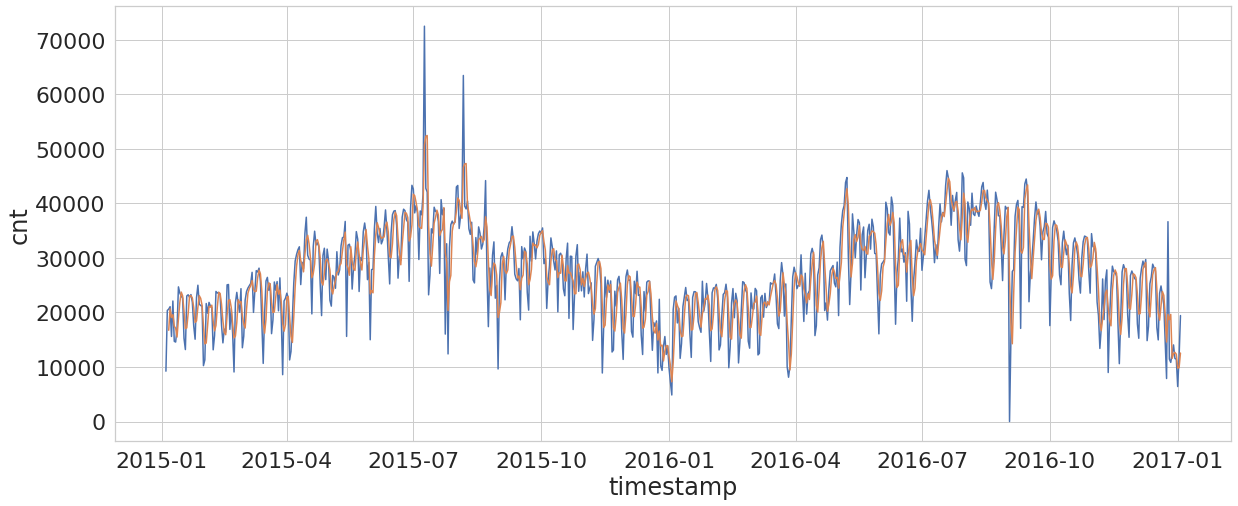

In [16]:
sns.lineplot(x=bike_day.index, y=bike_day.cnt)
sns.lineplot(x=bike_day.index, y=bike_day.MA_3)

In [17]:
bike_day.reset_index(inplace=True) #Сбросим колонку timestamp из индекса обратно в колонку

In [18]:
bike_day.query('timestamp == "2015-07-09"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,MA_3
186,2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,50705.0


In [49]:
#Вычислим разницу между значениями количества аренд и значениями скользящего
#среднего(результат будет Пандас серия)
c = bike_day.cnt - bike_day.MA_3

In [50]:
#Вычислим стандартное отклонение полученной серии
std = np.std(c)
std

4558.58664111794

In [36]:
#Добавим колонки с верхней и нижней границей 99% доверительного интервала
bike_day['upper_bound'] = bike_day['MA_3'] + 2.576 * std
bike_day['lower_bound'] = bike_day['MA_3'] - 2.576 * std

In [48]:
bike_day.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,MA_3,upper_bound,lower_bound
0,2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,NaN,NaN,NaN
1,2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,NaN,NaN,NaN
2,2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,16739.666667,28482.585854,4996.747479


In [51]:
#Отберём дни когда значения количества аренд превысили верхнюю границу интервала
bike_day.query('cnt > upper_bound ') \
        .sort_values('cnt', ascending=False)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,MA_3,upper_bound,lower_bound
186,2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,466.5,466.5,1625.0,357.5,50.0,0.0,0.0,24.0,46627.333333,58370.252521,34884.414146
721,2016-12-25,36653,300.0,300.0,1906.0,664.0,87.0,0.0,24.0,72.0,19650.666667,31393.585854,7907.747479
609,2016-09-04,27512,452.5,452.5,1676.5,561.5,71.0,0.0,24.0,48.0,14259.000000,26001.919188,2516.080812


In [ ]:
#Причина аномального количества аренд в забастовке работников метро

In [53]:
#Отберём дни когда значения количества аренд ниже нижней границы интервала
bike_day.query('cnt < upper_bound ') \
        .sort_values('cnt')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,MA_3,upper_bound,lower_bound
607,2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26086.333333,37829.252521,14343.414146
364,2016-01-03,4869,207.5,152.5,2004.0,388.5,98.0,0.0,24.0,72.0,7287.000000,19029.919188,-4455.919188
728,2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,9803.666667,21546.585854,-1939.252521
363,2016-01-02,7195,252.0,225.5,2088.5,518.5,121.0,0.0,24.0,72.0,10293.666667,22036.585854,-1449.252521
720,2016-12-24,7890,216.5,146.5,1808.5,597.5,47.0,0.0,24.0,72.0,14586.666667,26329.585854,2843.747479
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2016-07-20,44664,599.5,601.0,1416.0,457.0,28.0,0.0,0.0,24.0,44626.666667,56369.585854,32883.747479
574,2016-07-31,44678,432.5,432.0,1276.0,247.0,38.0,0.0,23.0,23.0,41879.666667,53622.585854,30136.747479
490,2016-05-08,44758,462.0,461.5,1371.5,373.5,24.0,0.0,24.0,0.0,42722.000000,54464.919188,30979.080812
573,2016-07-30,45608,468.5,465.5,1518.5,251.0,52.0,0.0,24.0,24.0,37401.666667,49144.585854,25658.747479


In [54]:
#Причина самого низкого количества аренд - ошибка при вводе данных